In [24]:
import pandas as pd
import numpy as np
import patsy
import seaborn as sns
from seaborn import plt
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

### Topic: Classification Metrics

**Settings: Where applicable, use test_size=0.30, random_state=4444. This will permit comparison of results across users.**

Data: congressional votes Congressional Voting Records Dataset

### Exercise 6.1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [2]:
df = pd.read_csv("../house_votes_84.csv",header=None)

In [4]:
for col in df.columns:
    for i,v in enumerate(df[col]):
        if v == 'n':
            df[col][i] = 0
        if v == 'y':
            df[col][i] = 1
        if v == 'republican':
            df[col][i] = 0
        if v == 'democrat':
            df[col][i] = 1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 17 columns):
0     435 non-null int64
1     435 non-null object
2     435 non-null object
3     435 non-null object
4     435 non-null object
5     435 non-null object
6     435 non-null object
7     435 non-null object
8     435 non-null object
9     435 non-null object
10    435 non-null object
11    435 non-null object
12    435 non-null object
13    435 non-null object
14    435 non-null object
15    435 non-null object
16    435 non-null object
dtypes: int64(1), object(16)
memory usage: 57.8+ KB


In [21]:
df.replace('y',1,inplace=True)
df.replace('n',0,inplace=True)
df.replace('?',np.nan,inplace=True)
df.fillna(df.mean(),inplace=True)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.362319,1.000000,1.000000,1.000000,0.000000,1.000000
1,0,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.812689
2,1,0.44208,1.000000,1.000000,0.417453,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
3,1,0.00000,1.000000,1.000000,0.000000,0.504762,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
4,1,1.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.423267,1.000000,1.000000,1.000000,1.000000
5,1,0.00000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
6,1,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.509756,1.000000,1.000000,1.000000
7,0,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.427518,1.000000
8,0,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
9,1,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.427518,0.812689


In [25]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.learning_curve import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score

In [26]:
X = df.iloc[:,1:]
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4444)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [71]:
model = KNeighborsClassifier()
fit = model.fit(X_train,y_train)
y_pred_knn = fit.predict(X_test)
y_proba_knn = fit.predict_proba(X_test)

print "KNN Accuracy Score: ", accuracy_score(y_test,y_pred)
print "KNN Precision Score: ", precision_score(y_test,y_pred)
print "KNN Recall Score: ", recall_score(y_test,y_pred)
print "KNN F1 Score: ", f1_score(y_test,y_pred)

KNN Accuracy Score:  0.946564885496
KNN Precision Score:  0.948717948718
KNN Recall Score:  0.961038961039
KNN F1 Score:  0.954838709677


In [72]:
model = LogisticRegression()
fit = model.fit(X_train,y_train)
y_pred_logr = fit.predict(X_test)
y_proba_logr = fit.predict_proba(X_test)

print "Logistic Regression Accuracy Score: ", accuracy_score(y_test,y_pred)
print "Logistic Regression Precision Score: ", precision_score(y_test,y_pred)
print "Logistic Regression Recall Score: ", recall_score(y_test,y_pred)
print "Logistic Regression F1 Score: ", f1_score(y_test,y_pred)

Logistic Regression Accuracy Score:  0.946564885496
Logistic Regression Precision Score:  0.948717948718
Logistic Regression Recall Score:  0.961038961039
Logistic Regression F1 Score:  0.954838709677


In [73]:
model = GaussianNB()
fit = model.fit(X_train,y_train)
y_pred_gauss = fit.predict(X_test)
y_proba_gauss = fit.predict_proba(X_test)

print "Gaussian Accuracy Score: ", accuracy_score(y_test,y_pred)
print "Gaussian Precision Score: ", precision_score(y_test,y_pred)
print "Gaussian Recall Score: ", recall_score(y_test,y_pred)
print "Gaussian F1 Score: ", f1_score(y_test,y_pred)

Gaussian Accuracy Score:  0.946564885496
Gaussian Precision Score:  0.948717948718
Gaussian Recall Score:  0.961038961039
Gaussian F1 Score:  0.954838709677


In [75]:
model = SVC()
fit = model.fit(X_train,y_train)
y_pred_svc = fit.predict(X_test)

print "SVM Classifier Accuracy Score: ", accuracy_score(y_test,y_pred)
print "SVM Classifier Precision Score: ", precision_score(y_test,y_pred)
print "SVM Classifier Recall Score: ", recall_score(y_test,y_pred)
print "SVM Classifier F1 Score: ", f1_score(y_test,y_pred)

SVM Classifier Accuracy Score:  0.946564885496
SVM Classifier Precision Score:  0.948717948718
SVM Classifier Recall Score:  0.961038961039
SVM Classifier F1 Score:  0.954838709677


In [76]:
model = DecisionTreeClassifier()
fit = model.fit(X_train,y_train)
y_pred_dtree = fit.predict(X_test)
y_proba_dtree = fit.predict_proba(X_test)

print "Decision Tree Accuracy Score: ", accuracy_score(y_test,y_pred)
print "Decision Tree Precision Score: ", precision_score(y_test,y_pred)
print "Decision Tree Recall Score: ", recall_score(y_test,y_pred)
print "Decision Tree F1 Score: ", f1_score(y_test,y_pred)

Decision Tree Accuracy Score:  0.946564885496
Decision Tree Precision Score:  0.948717948718
Decision Tree Recall Score:  0.961038961039
Decision Tree F1 Score:  0.954838709677


In [77]:
model = RandomForestClassifier()
fit = model.fit(X_train,y_train)
y_pred_randfor = fit.predict(X_test)
y_proba_randfor = fit.predict_proba(X_test)

print "Random Forest Accuracy Score: ", accuracy_score(y_test,y_pred)
print "Random Forest Precision Score: ", precision_score(y_test,y_pred)
print "Random Forest Recall Score: ", recall_score(y_test,y_pred)
print "Random Forest F1 Score: ", f1_score(y_test,y_pred)

Random Forest Accuracy Score:  0.946564885496
Random Forest Precision Score:  0.948717948718
Random Forest Recall Score:  0.961038961039
Random Forest F1 Score:  0.954838709677


### Exercise 6.2

For each, draw the Precision-Recall curve, ROC curve and calculate the AUC.

In [51]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc

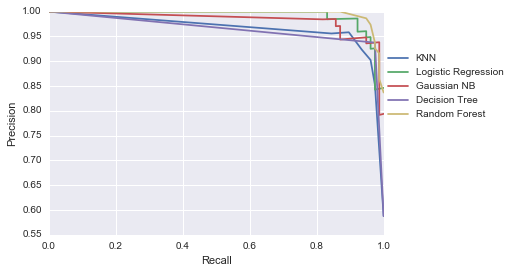

In [84]:
y_probas = [y_proba_knn,y_proba_logr,y_proba_gauss,y_proba_dtree,y_proba_randfor]
models = ['KNN','Logistic Regression','Gaussian NB','Decision Tree','Random Forest']

for y in y_probas:
    precision, recall, threshold = precision_recall_curve(y_test,y[:,1])
    plt.xlim(0,1)
    plt.ylabel('Precision')
    plt.xlabel('Recall')
    plt.plot(recall,precision)
    plt.legend(models,loc=[1,.5])

AUC KNN 0.948412698413
AUC Logistic Regression 0.987734487734
AUC Gaussian NB 0.977032227032
AUC Decision Tree 0.940716690717
AUC Random Forest 0.993265993266


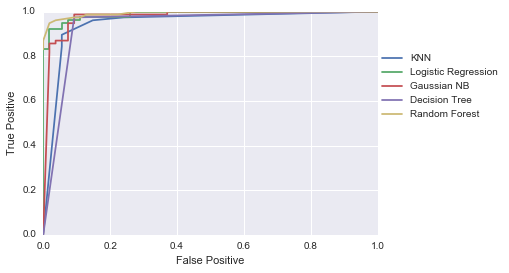

In [89]:
y_probas = [y_proba_knn,y_proba_logr,y_proba_gauss,y_proba_dtree,y_proba_randfor] 

for i,y in enumerate(y_probas):
    fpr, tpr, threshold = roc_curve(y_test, y[:,1])
    plt.xlim(0,1)
    plt.ylabel('True Positive')
    plt.xlabel('False Positive')
    plt.plot(fpr,tpr)    
    plt.legend(models,loc=[1,.5])
    print "AUC " + models[i] +" "+ str(auc(fpr,tpr))

### Exercise 6.3

Draw the Precision-Recall curve, ROC curve (and calculate AUC) for the logistic regression classifier from Exercise 5.12 in 05-Classification Challenge that uses Haberman Survival Dataset

In [106]:
df3 = pd.read_csv("haberman.data.csv",header=None,names=['age','opyr','numpos','survstat'])

In [107]:
df3.head()

,age,opyr,numpos,survstat
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [108]:
X = df3.iloc[:,:3]
y = df3.iloc[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=4444)

In [109]:
model = LogisticRegression()
fit = model.fit(X_train,y_train)
y_pred = fit.predict(X_test)
y_proba = fit.predict_proba(X_test)

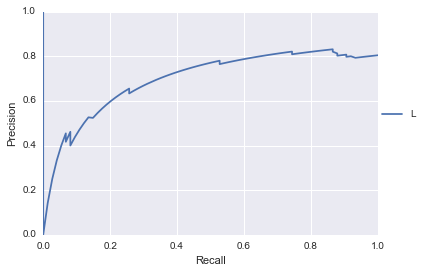

In [113]:
precision, recall, threshold = precision_recall_curve(y_test,y_proba[:,1],pos_label=1)
plt.xlim(0,1)
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.plot(recall,precision)
plt.legend("LR",loc=[1,.5])

AUC Logistic Regression: 0.352477477477


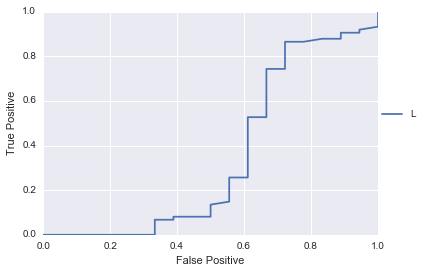

In [115]:
fpr, tpr, threshold = roc_curve(y_test, y_proba[:,1],pos_label=1)
plt.xlim(0,1)
plt.ylabel('True Positive')
plt.xlabel('False Positive')
plt.plot(fpr,tpr)    
plt.legend("LR",loc=[1,.5])
print "AUC Logistic Regression: "+ str(auc(fpr,tpr))